In [4851]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt
import numpy as np
import csv

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [4852]:
def game(ra, rb):
    scores_A=0
    scores_B=0
    probability = ra / (ra + rb)
    while (scores_A < 11 and scores_B < 11) or (( scores_A >9 and scores_B >9) and ((-1<=scores_A-scores_B<2)or(-1<scores_A-scores_B<2))):
        r = random.random()
        while r == probability:
            r = random.random()
        if probability > r:
            scores_A += 1
        else:
            scores_B += 1

    return scores_A,scores_B

**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [4853]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [4854]:
def win_probability_game(ra, rb, simulations=1000):
    A = 0
    B = 0
    for n in range (simulations):
        result=game(ra, rb)
        if result[0]>result[1]:
            A += 1
        else:
            B += 1
    return A / simulations


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [4855]:
# Print win_probability_game(70, 30) to 2 decimal places for a suitable value of n:
print(round(win_probability_game(70, 30), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [4856]:
def read_abilities(file): # HINT: what should the argument be?
    with open (file) as test:
        rdr = csv.reader(test)
        ability = []
        for n, row in enumerate(rdr):
            if n > 0:
                value = row[0] + row[1]
                ability.append((int(row[0]) , int(row[1])))
    return (ability)

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [4857]:
# Print the result of calling the function for the file `test.csv`
read_abilities("test.csv")

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]

**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [4858]:
def plot_win_probabilities(file, show=1): # HINT: what should the argument be?
    list = read_abilities(file) 
    x_points = np.array([])
    y_points = np.array([])
    
    for n in list:
        a = int(n[0])
        b = int(n[1])
        prob = win_probability_game(a, b)
        x_points = np.append(x_points,[a/b])
        y_points = np.append(y_points,[prob])
        
    plt.scatter(x_points, y_points, color = "red", label = "PARS")
    if show == 1:
        y = 'Probability a wins'
        x = "ra / rb"
        plt.xlabel(x)
        plt.ylabel(y)
        plt.subplot().legend()
        plt.title("Probability of A winning a games in different ra/rb")
        plt.show()


**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

<img src="win_probabilities.png" alt="Win probabilities" width="500">


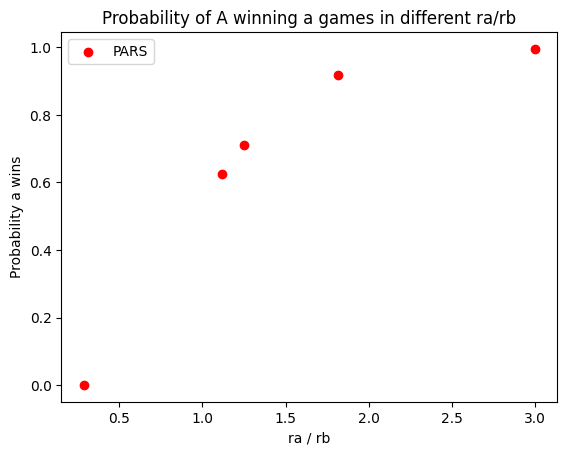

In [4859]:
# Call the function to plot the figure here
plot_win_probabilities("test.csv")

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [4860]:
def win_probability_match(ra, rb, simulations=1000, m=3):
    a = 0
    b = 0
    for i in range(simulations):
        n_a = 0
        n_b = 0
        while (n_a!=m) and (n_b != m):
            result = game(ra, rb)
            if int(result[0]) > int(result[1]):
                n_a += 1
            else:
                n_b += 1
        if n_a == m:
            a += 1
        else:
            b += 1
    return a /simulations


In [4861]:
win_probability_match(70, 30)

1.0

In [4862]:
def plot_win_probabilities_match(file, show = 1): # HINT: what should the argument be?
    list = read_abilities(file) 
    x_points = np.array([])
    y_points = np.array([])
    
    for n in list:
        a = int(n[0])
        b = int(n[1])
        prob = win_probability_match(a, b)
        x_points = np.append(x_points,[a/b])
        y_points = np.append(y_points,[prob])
        
    plt.scatter(x_points, y_points, color = "red", label = "PARS")
    if show == 1:
        y = 'Probability a winning 3 games'
        x = "ra / rb"
        plt.title("Probability of A winning 3 games in different ra/rb")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.subplot().legend()
        plt.show()

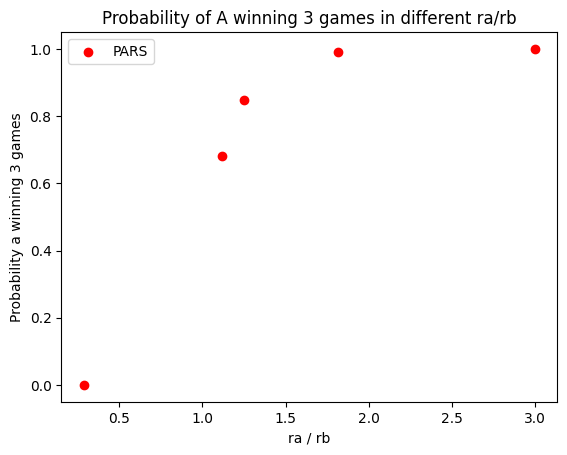

In [4863]:
plot_win_probabilities_match("test.csv")

Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better'' scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

Functions for English scoring system
=========================================
**Q2.a** Implementation for English scoring system

In [4864]:
def eng_game(ra, rb):
    scores_A = 0
    scores_B = 0
    server_a = 1
    server_b = 0
    c = 0
    probability = ra / (ra + rb)
    while (scores_A < 9 and scores_B < 9) or (( 10>scores_A >7 and 10>scores_B >7) and ((-1<scores_A-scores_B<2)or(-1<scores_B-scores_A<2))):
        r = random.random()
        c = 0

        while r == probability:
            r = random.random()
            
        if server_a ==1 and c ==0:
            if (probability > r):
                scores_A += 1
                c = 1
                #print("a")
            elif (probability < r):
                server_b = 1
                server_a = 0
                c = 1
                #print("change to b server")
        if server_b ==1 and c == 0:
            if ((1-probability) < r):
                server_a = 1
                server_b = 0
                c = 1
                #print("change to a serve")
            elif ((1-probability) > r):
                scores_B +=1
                c = 1
                #print("b")
        

    return scores_A,scores_B


**Testing:** if random seed is set to 70, and calling function `eng_game(ra=30, rb=30)` for 10 times

In [4865]:
random.seed(70)
for i in range(10):
    print(eng_game (30, 30))

(1, 9)
(3, 9)
(10, 8)
(9, 3)
(9, 4)
(10, 9)
(9, 7)
(9, 2)
(9, 4)
(9, 7)


**Question 2b:** `eng_win_probability_game(ra, rb, simulations)` is to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

In [4866]:
def eng_win_probability_game(ra, rb, simulations=1000):
    A = 0
    B = 0
    for n in range (simulations):
        result=eng_game(ra, rb)
        if result[0]>result[1]:
            A += 1
        else:
            B += 1
    return A / simulations

**Testing:** Given sufficient simulations, calling the function with abilities `30` and `30` and printed to 2 decimal places.

In [4867]:
print(round(eng_win_probability_game(30, 30), 2))

0.54


**Question 2c:** Taking a `list` of the format returned by 1c as an argument, and using `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

In [4868]:
def plot_eng_win_probabilities(file, show = 1): # HINT: what should the argument be?
    list = read_abilities(file) 
    x_points = np.array([])
    y_points = np.array([])
    
    for n in list:
        a = int(n[0])
        b = int(n[1])
        prob = eng_win_probability_game(a, b)
        x_points = np.append(x_points,[a/b])
        y_points = np.append(y_points,[prob])
        
    plt.scatter(x_points, y_points, color = "black", label = "English Scoring")
    if show == 1:
        y = 'Probability a wins '
        x = "ra / rb"
        plt.subplot().legend()
        plt.title("Probability of A winning a games in different ra/rb")
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()


**Testing:** The following figure result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]'

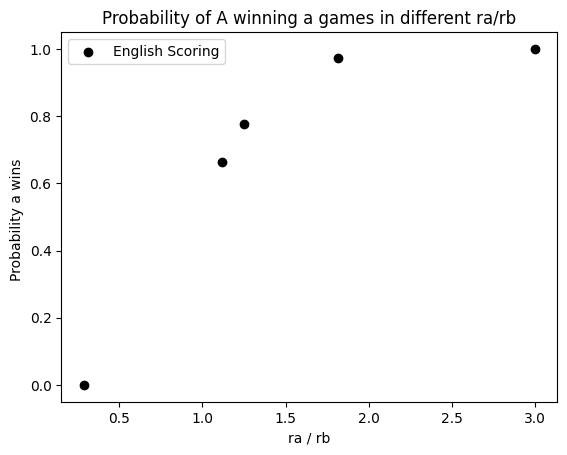

In [4869]:
plot_eng_win_probabilities("test.csv")

**Question 2d:** The following function `eng_win_probability_match(ra, rb, simulations, m)` is to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

In [4870]:
def eng_win_probability_match(ra, rb, simulations=1000, m=3):
    a = 0
    b = 0
    for i in range(simulations):
        n_a = 0
        n_b = 0
        while (n_a!=m) and (n_b != m):
            result = eng_game(ra, rb)
            if int(result[0]) > int(result[1]):
                n_a += 1
            else:
                n_b += 1
        if n_a == m:
            a += 1
        else:
            b += 1
    return a /simulations

In [4871]:
eng_win_probability_match(30, 30)

0.551

**Question 2e:** Taking a `list` of the format returned by 1c as an argument, and using `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair by winning 3 games.

In [4872]:
def plot_eng_win_probabilities_match(file, show = 1): # HINT: what should the argument be?
    list = read_abilities(file) 
    x_points = np.array([])
    y_points = np.array([])
    
    for n in list:
        a = int(n[0])
        b = int(n[1])
        prob = eng_win_probability_match(a, b)
        x_points = np.append(x_points,[a/b])
        y_points = np.append(y_points,[prob])
        
    plt.scatter(x_points, y_points, color = "black", label = "English Scoring")
    if show == 1:
        y = "Probability a winning 3 games"
        x = "ra / rb"
        plt.title("Probability of A winning 3 games in different ra/rb")
        plt.subplot().legend()
        plt.xlabel(x)
        plt.ylabel(y)
        plt.show()

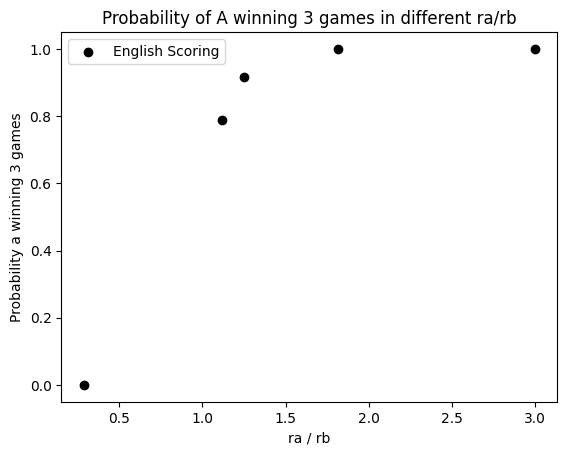

In [4873]:
plot_eng_win_probabilities_match("test.csv")

**Combining graphs** plotting `plot_win_probabilities` and `plot_eng_win_probabilities` in one graph by using data in file `test.csv`.

In [4874]:
def combine_graph(file, show = 0):
    list = read_abilities(file) 
    x_points = np.array([])
    y_points = np.array([])
    xpoints = np.array([])
    ypoints = np.array([])
    
    plot_win_probabilities_match(file, show)
    plot_eng_win_probabilities_match(file, show)
    y = 'Probability a wins 3 games'
    x = "ra / rb"
    plt.subplot().legend()
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title("Probability of A winning 3 games in different ra/rb")
    plt.show()

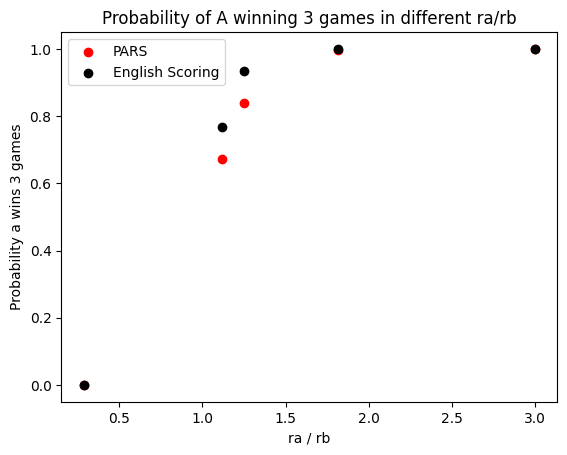

In [4875]:
combine_graph("test.csv")

## Problem
The problem I have been working with is comparing the two different scoring systems in squash games. They are Point-a-rally scoring (PARS) and English scoring. The main difference is the number of points for winning a game. For PARS, players need to reach at least 11 points to win a rally and for English scoring is 9. Also, only the server receives a point if he/she wins a rally in English scoring.

Therefore, the problem is to determine which scoring system is better by fairness, according to their abilities.

## Method
To compare, I simulated both of the scoring systems, which are `game(ra, rb)`(PARS) and `eng_game(ra, rb)`(English scoring system). They return the simulated result of a game by inputting the player's abilities(ra, rb). On the hand, `win_probility_match` and `eng_win_probility_match` are using `game(ra, rb)`(PARS) and `eng_game(ra, rb)` to simulate the probability of player A winning the match. Therefore, I can find the difference in the probability of player A winning a match under the two scoring systems.

In the meantime, I used functions `plot_win_pobabilty`(PARS) and `plot_win_pobabilty`(English scoring system) to plot graphs to find the trend of player A winning probability in a game. All the testing data are stored in `test_50.csv`. Then, combine the two graphs by using `combine_grapg()`. Thus, it can show the difference clearly.

## Assumptions
Assume players can only win a point when their probability of winning is larger than a random real number (r) between 0,1. **r** is refreshed every rally, so both players may have a chance of winning a point. However, the random seed is set to 70 to compare more easily. Also, we only consider their ability and exclude other factors such as environment, player condition etc. Numbers between 0, and 100 represent the abilities. When the numbers are larger, the players have high abilities and lower abilities when the number is lower.

## Results
Let ra=70, rb=50:
By calling `win_probility_match` and `eng_win_probility_match`, player A has  0.041 higher probability on winner under English scoring sysytem than PARS.

In [4876]:
random.seed(70)
print(win_probability_match(70,50))
print(eng_win_probability_match(70,50))

0.947
0.988


To compare the trend of the probability player A wins in graphs, we called `combine_graph("test_50.csv")` and used data in `test_50.csv`. It is shown below.
The graph shows that player A has a higher probability of winning under English scoring than PARS when player A's abilities are 1.0-1.9 times of player B's. At the same time, player A has a lower probability of winning under English scoring than PARS when player A's abilities are 0.5-0.9 times player B's.
However, they got a similar flow. Sharply increasing at x=0.75 to x=1.25 and increasing gently between x = 1.25 and x = 3.0.

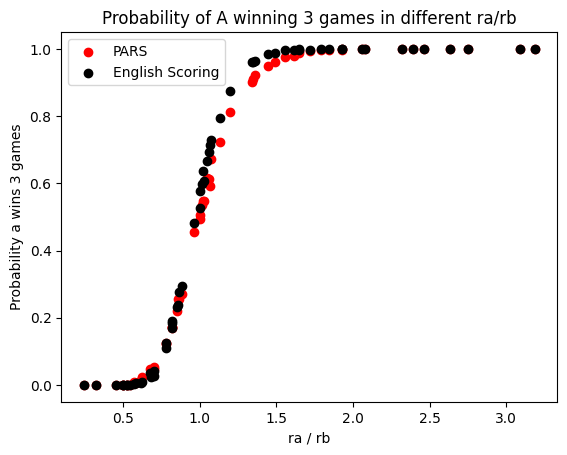

In [4877]:
combine_graph("test_50.csv")

## Conclusions
From the result, the two systems are both fair. However, under English Scoring, the player with much higher ability than another player has a higher possibility of winning than under PARS. Oppositely, under PARS, the player with much higher ability than another player has a lower possibility to win than under English Scoring.
Therefore, the player with much higher abilities benefits more from English Scoring. Conversely, the player with much lower abilities benefits more from PARS.
However, because other factors, such as player's pressure, condition, health etc., are not included in this simulation, there is an error when applied to real life.
Because those factors usually have a massive influence on players and affect the result of matches. Thus, there are limitations to using the player's ability to evaluate the probability of winning. To optimise the simulator, data from other factors(e.g. player's pressure, condition, health etc.) could be added to it and make a more comprehensive player database. By getting more data, we can make the algorithm more accurate.